# <center> Nutrition Health Survey - Age Prediction </center>


The National Health and Nutrition Examination Survey (NHANES) is a nationally representative health study conducted by the CDC’s National Center for Health Statistics. It uniquely combines interviews, physical exams, and lab tests to assess the health and nutritional status of U.S. children and adults. 


This dataset is a subset, focused part of the NHANES study by CDC, which looks at health and nutrition trends in the U.S. It has 6,287 entries and 7 key features: covering things like body stats, lifestyle, and lab results.

## Problem Statement

The task is simple: predict if a person is a senior (65+) or not. NHANES collected data through home visits, mobile clinics, and lab tests, giving a good mix of real and reported info. This trimmed version keeps only what’s needed, making it perfect for health-based age prediction.

## About the Data

The data contains two files: train.csv and test.csv

- train.csv - which contains the training set observations. 2,016 rows, which have the target variable (age_group) values as well for training the model.

- test.csv - which contains the testing set observations. 312 rows, with the target column missing. Use the trained model to predict and submit the values of the target column.

Respondents 65 years old and older were labeled as “Senior” and all individuals under 65 years old as “Adult”

### Target Variable Classes

- Adult - 0
- Senior - 1

### Features

The dataset contains the following features:

- SEQN: Sequence number (identifier)

- RIAGENDR: Respondent's Gender (1=Male, 2=Female)

- PAQ605: Physical activity questionnaire response: If the respondent engages in moderate or vigorous-intensity sports, fitness, or recreational activities in the typical week

- BMXBMI: Body Mass Index

- LBXGLU: Glucose level

- DIQ010: Diabetes questionnaire response

- LBXGLT: Glucose tolerance (Oral)

- LBXIN: Insulin level

In [485]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the training dataset:

In [486]:
train = pd.read_csv('Train_Data.csv')
test = pd.read_csv('Test_Data.csv')

In [487]:
train.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [488]:
test.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12


In [489]:
train.shape

(1966, 9)

In [490]:
test.shape

(312, 8)

In [491]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB


In [492]:
train.describe()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,1954.000000,1948.000000,1953.000000,1948.000000,1953.000000,1948.000000,1955.000000,1957.000000
mean,78683.621801,1.510267,1.825397,27.965400,99.491039,2.015914,115.150384,11.862892
std,2924.115709,0.500023,0.399449,7.327616,16.774665,0.187579,46.271615,9.756713
min,73564.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76194.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.800000
50%,78717.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.030000
75%,81217.000000,2.000000,2.000000,31.300000,104.000000,2.000000,131.000000,14.480000
max,83727.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


Checking for null values:

In [493]:
train.isnull().sum()

SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64

In [494]:
test.isnull().sum()

SEQN        2
RIAGENDR    2
PAQ605      1
BMXBMI      1
LBXGLU      1
DIQ010      1
LBXGLT      2
LBXIN       1
dtype: int64

In [495]:
train.duplicated().sum()

np.int64(0)

In [496]:
train.age_group.value_counts()

age_group
Adult     1638
Senior     314
Name: count, dtype: int64

## Data Visualization

Text(0.5, 1.0, 'Age Group Distribution')

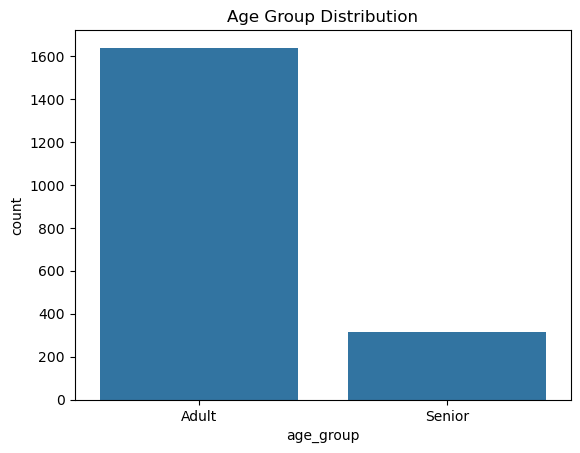

In [497]:
sns.countplot(data=train, x='age_group')
plt.title('Age Group Distribution')

Text(0.5, 1.0, 'Gender Distribution')

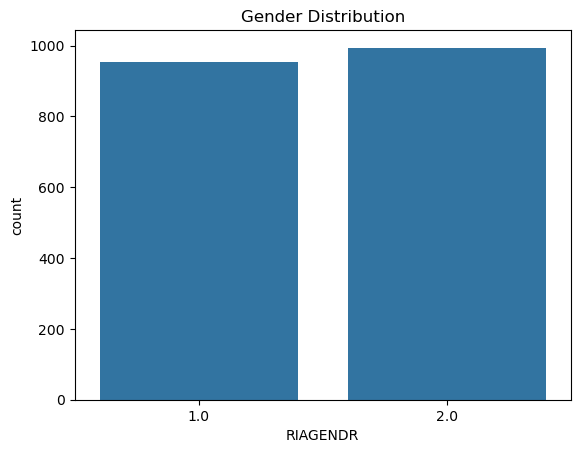

In [498]:
sns.countplot(data=train, x='RIAGENDR')
plt.title('Gender Distribution')

## Model Building

Importing relevant libraries

In [499]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Data Pre-Processing

In [500]:
X = train.drop(columns = ['SEQN', 'age_group'])
y = train.age_group

In [501]:
impute_med = SimpleImputer(strategy='median')
impute_mode = SimpleImputer(strategy='most_frequent')

med_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']
mod_cols = ['PAQ605', 'DIQ010', 'RIAGENDR']

X[med_cols] = impute_med.fit_transform(X[med_cols])
X[mod_cols] = impute_mode.fit_transform(X[mod_cols])

In [502]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

For target variable:

In [503]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

### Train-Test Split

In [504]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

### Model Fitting

In [505]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Model Prediction

In [506]:
y_pred = model.predict(X_test)

#### Classification Report

In [507]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       335
           1       0.50      0.17      0.25        54
           2       0.00      0.00      0.00         5

    accuracy                           0.85       394
   macro avg       0.46      0.38      0.39       394
weighted avg       0.81      0.85      0.81       394



c:\Users\gyanada\anaconda3\envs\newen\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gyanada\anaconda3\envs\newen\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gyanada\anaconda3\envs\newen\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result

#### Accuracy Score

In [508]:
accuracy_score(y_test, y_pred)

0.850253807106599

## Predicting for Test Data

Importing test dataset:

In [509]:
ID = test.SEQN

In [510]:
X_test = test.drop(columns = ['SEQN'])

Pre-processing test data:

In [511]:
X_test[med_cols] = impute_med.fit_transform(X_test[med_cols])
X_test[mod_cols] = impute_mode.fit_transform(X_test[mod_cols])

In [512]:
X_test_scaled = scaler.fit_transform(X_test)

In [513]:
X_test_scaled.shape

(312, 7)

In [514]:
y_test_df = model.predict(X_test_scaled)

In [515]:
y_test_df

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [516]:
result = pd.DataFrame({'age_group': y_test_df})

In [517]:
result

,age_group
0,0
1,0
2,0
3,0
4,0
...,...
307,0
308,0
309,0
310,0


In [518]:
result.to_csv("submission.csv", index=False) #this file will appear under the output section of the right navbar. You need to submit this csv file